# Loading the required Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Dataset

In [85]:
path = '/Users/saifullah/Desktop/Data analysis/Flight-Price-Prediction/Online Retail.xlsx'
data = pd.ExcelFile(path)

df = data.parse('Online Retail')


In [86]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [87]:
# Display the structure to inspect the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Dataset Overview

**Total Records**: 541,909

**Columns**: 8

*   **InvoiceNo**: Unique invoice identifier (object).

*   **StockCode**: Unique product identifier (object).

*   **Description**: Product description (object) — contains some missing values.

*   **Quantity**: Number of items purchased (int64).

*   **InvoiceDate**: Date and time of the transaction (datetime64[ns]).

*   **UnitPrice**: Price per unit of the product (float64).

*   **CustomerID**: Customer identifier (float64) — contains missing values.

*   **Country**: Country of the customer (object).

# Handling Missing Values

In [89]:


# Checking for missing Values
df.isnull().sum()

 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# check missing in a subset of dataset
df = pd.read_excel(path, sheet_name = 'Online Retail', nrows = 15000)

df.isnull().sum()


InvoiceNo         0
StockCode         0
Description      60
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     4271
Country           0
dtype: int64

In [94]:
# drop the rows with missing values of feature Description
df = df.dropna(subset=['Description'])
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     4211
Country           0
dtype: int64

# Handling Duplicate Values

In [97]:
# check for Duplicate rows
duplicate_rows = df[df.duplicated()]

# Count of duplicate rows
num_duplicates = duplicate_rows.shape[0]

num_duplicates

260

In [98]:
# Remove the duplicated rows
df = df.drop_duplicates()


In [99]:
# Check again for duplicates after removal
df.duplicated().sum()

0

# Analyzing Sales trends

 1. **Aggregating total sales over time**

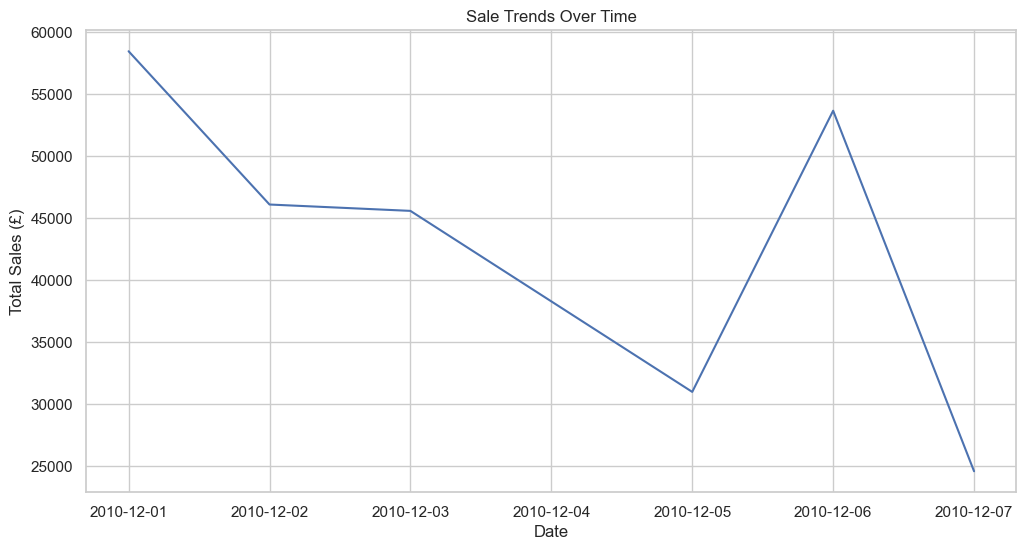

In [104]:
# Adding a new Column for total sales
df['TotalSales'] = (df['Quantity'] * df['UnitPrice'])

# Aggregating total sales over time 

sales_trend = df.groupby(df['InvoiceDate'].dt.date)['TotalSales'].sum()

# plotting sales trends over time 
plt.figure(figsize=(12,6))
sales_trend.plot()
plt.title("Sale Trends Over Time")
plt.xlabel('Date')
plt.ylabel('Total Sales (£)')
plt.grid(True)
plt.show()

2. **Aggregating Sales Data by Product**

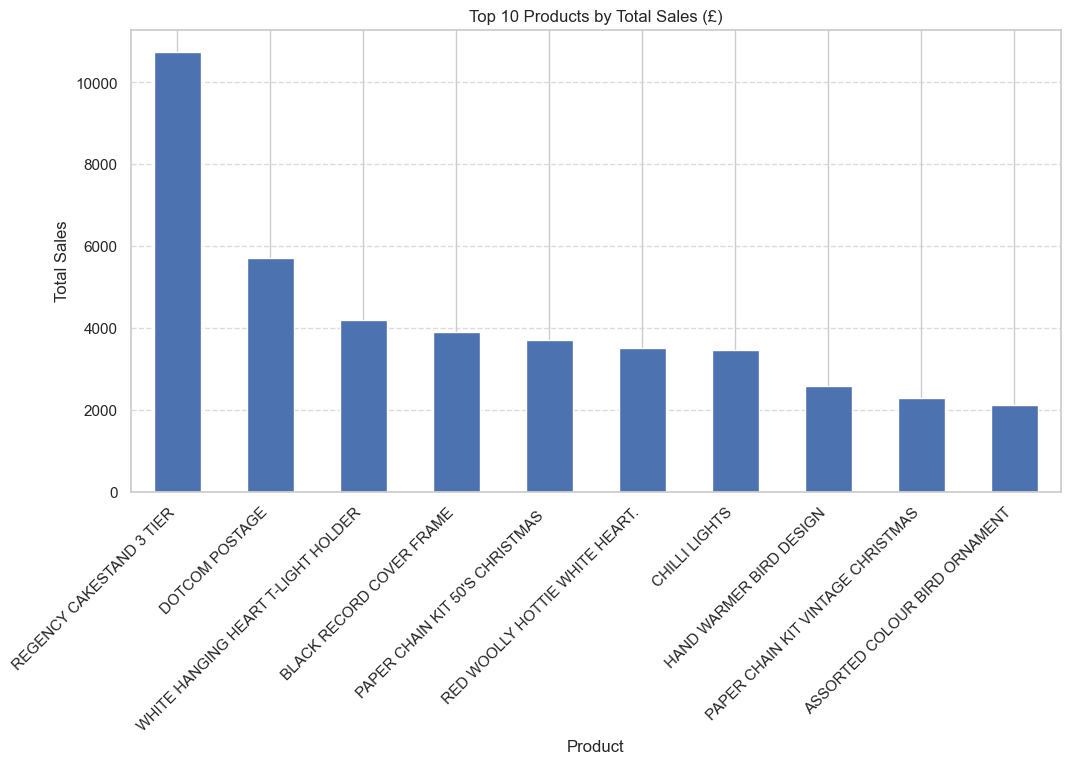

In [115]:
product_performance = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10) # Top 10 products by total sales 
plt.figure(figsize=(12,6))
product_performance.plot(kind='bar')
plt.title('Top 10 Products by Total Sales (£)')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45, ha='right')
plt.grid(axis='y', linestyle = '--', alpha = 0.7)
plt.show()

3. **Relationship Between Quantity Sold and Revenue**

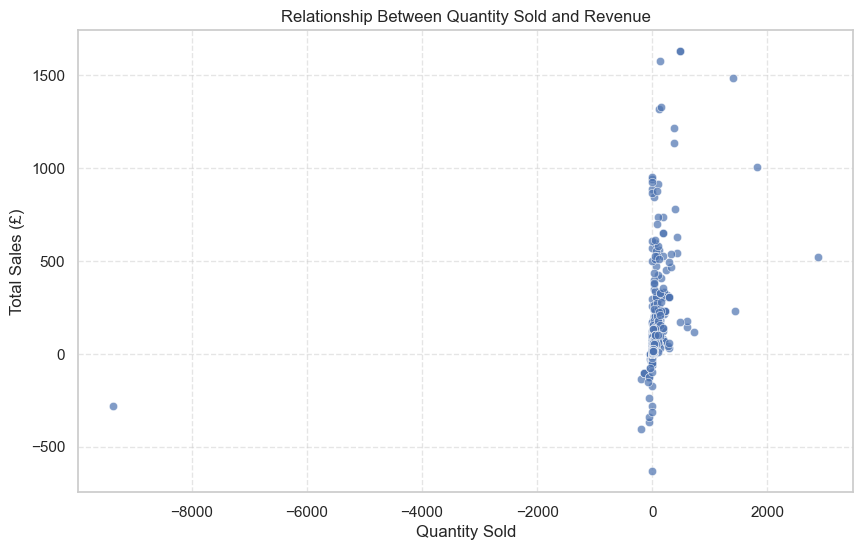

In [112]:
import seaborn as sns

# Scatter Plot of Quantity vs TotalSales 
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Quantity', y = 'TotalSales', alpha = 0.7)

plt.title('Relationship Between Quantity Sold and Revenue')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales (£)')
plt.grid(True, linestyle = "--", alpha = 0.5)
plt.show()

The scatter plot shows the relationship between the quantity of products sold and the Revenue (total sales (£)). 

**Key observations include:**

1. Higher quantities often correlate with increased total sales, but there are anomalies where large quantities generate low revenue, possibly due to discounts or low unit prices.

2. Some small quantities result in high revenue, potentially indicating high-priced items.

*   **Investigating Anomolies**

In [116]:
# Investigating anomolies: Bulk Quantity Sold with Low revenue
# Filtering for Cases where high quantities result in low total sales 

anomolies = df[(df['Quantity']>100) & (df['TotalSales']<50)]

print(anomolies)

"""I’ve identified anomalies where large quantities were sold, but total sales were low, likely due to low unit prices. These transactions involve items like inexpensive decorations, cards, and small accessories."""

      InvoiceNo StockCode                      Description  Quantity  \
219      536390     20668  DISCO BALL CHRISTMAS DECORATION       288   
227      536390     21786               POLKADOT RAIN HAT        144   
4451     536783     21506       FANCY FONT BIRTHDAY CARD,        108   
4458     536783     16237             SLEEPING CAT ERASERS       270   
12015    537362     17003              BROCADE RING PURSE        144   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  
219   2010-12-01 10:19:00       0.10     17511.0  United Kingdom       28.80  
227   2010-12-01 10:19:00       0.32     17511.0  United Kingdom       46.08  
4451  2010-12-02 15:19:00       0.36     15061.0  United Kingdom       38.88  
4458  2010-12-02 15:19:00       0.16     15061.0  United Kingdom       43.20  
12015 2010-12-06 12:34:00       0.21     17596.0  United Kingdom       30.24  


'I’ve identified anomalies where large quantities were sold, but total sales were low, likely due to low unit prices. These transactions involve items like inexpensive decorations, cards, and small accessories.'